In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import seaborn as sns


2025-05-17 02:38:58.460917: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747449538.663203      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747449538.728066      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
IMAGE_SIZE = 224
CHANNELS = 3
BATCH_SIZE = 32

In [3]:
original_train_dir = '/kaggle/input/fine-grained-fruit-quality-assessment/train/train'
orig_train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

orig_train_data = orig_train_datagen.flow_from_directory(
    original_train_dir,  # Point to the new writable directory
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 7395 images belonging to 7 classes.


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


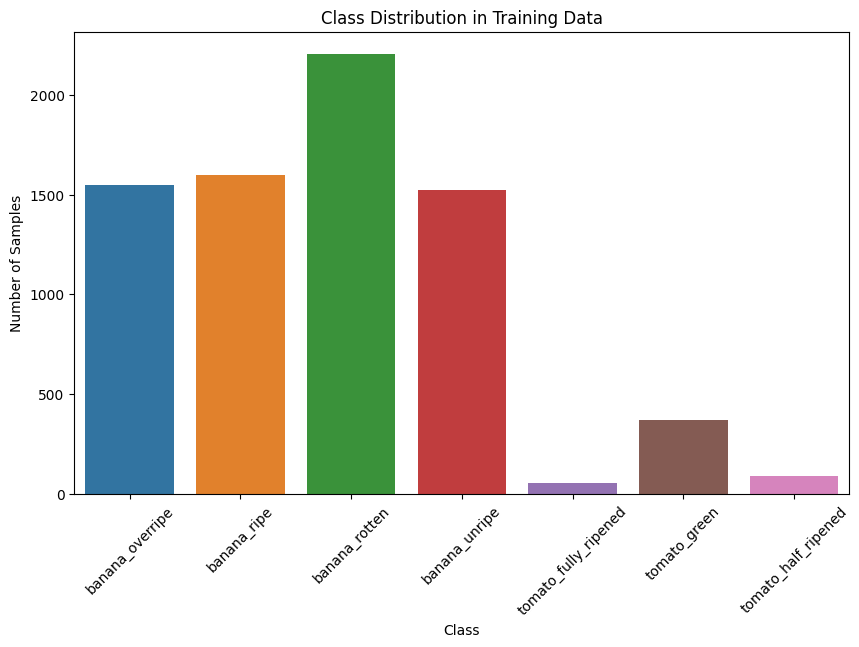

In [4]:
# Get class labels and their corresponding indices
class_labels = list(orig_train_data.class_indices.keys())

# Count the number of samples per class
class_counts = np.bincount(orig_train_data.classes)

# Plot the class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_labels, y=class_counts)
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()

In [5]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Define the base directory where your training data is located
base_dir = '/kaggle/input/fine-grained-fruit-quality-assessment/train/train'

# Specify the classes you want to augment
classes_to_augment = ['tomato_half_ripened', 'tomato_green', 'tomato_fully_ripened']

# Specify the number of augmented images to generate per class
num_augmented_images = 500

# Define the base directory for saving augmented data in the writable /kaggle/working/ directory
augmented_base_dir = '/kaggle/working/augmented_data'
os.makedirs(augmented_base_dir, exist_ok=True)

# Initialize the ImageDataGenerator for augmentation
datagen_augment = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
for class_name in classes_to_augment:
    original_class_dir = os.path.join(base_dir, class_name)
    augmented_class_dir = os.path.join(augmented_base_dir, class_name)  # Save in /kaggle/working/augmented_data/class_name
    os.makedirs(augmented_class_dir, exist_ok=True)

    image_files = [f for f in os.listdir(original_class_dir) if os.path.isfile(os.path.join(original_class_dir, f))]
    print(f"Found {len(image_files)} images in class: {class_name}")

    # Create a generator for the current class, saving to the augmented directory in /kaggle/working/
    image_generator = datagen_augment.flow_from_directory(
        base_dir,
        classes=[class_name],
        target_size=(224, 224),
        batch_size=1,
        shuffle=True,
        save_to_dir=augmented_class_dir,  
        save_prefix='augmented',
        save_format='jpg'
    )

    # Generate the specified number of augmented images
    num_generated = 0
    for _ in range(num_augmented_images):
        next(image_generator)
        num_generated += 1
    print(f"Generated {num_generated} augmented images for class: {class_name} in {augmented_class_dir}")

print("Augmentation process complete! Augmented images are saved in /kaggle/working/augmented_data/")

Found 90 images in class: tomato_half_ripened
Found 90 images belonging to 1 classes.
Generated 500 augmented images for class: tomato_half_ripened in /kaggle/working/augmented_data/tomato_half_ripened
Found 371 images in class: tomato_green
Found 371 images belonging to 1 classes.
Generated 500 augmented images for class: tomato_green in /kaggle/working/augmented_data/tomato_green
Found 55 images in class: tomato_fully_ripened
Found 55 images belonging to 1 classes.
Generated 500 augmented images for class: tomato_fully_ripened in /kaggle/working/augmented_data/tomato_fully_ripened
Augmentation process complete! Augmented images are saved in /kaggle/working/augmented_data/


In [6]:
import shutil

# Define the source and destination directories
original_train_dir = '/kaggle/input/fine-grained-fruit-quality-assessment/train/train'
writable_train_dir = '/kaggle/working/writable_train_data'
augmented_base_dir = '/kaggle/working/augmented_data'

# Create the writable train directory and copy the original data
if os.path.exists(writable_train_dir):
    shutil.rmtree(writable_train_dir)  # Remove if it exists from a previous run
shutil.copytree(original_train_dir, writable_train_dir)
print(f"Original training data copied to {writable_train_dir}")

# Move augmented images to the corresponding class folders in the writable directory
for class_name in classes_to_augment:
    src_dir = os.path.join(augmented_base_dir, class_name)
    dest_dir = os.path.join(writable_train_dir, class_name)
    for filename in os.listdir(src_dir):
        if filename.startswith('augmented'):
            src_file = os.path.join(src_dir, filename)
            dest_file = os.path.join(dest_dir, filename)
            shutil.move(src_file, dest_file)
    print(f"Moved augmented images for {class_name} to {dest_dir}")


print("ImageDataGenerators are now set up to use the training data with augmented images.")

Original training data copied to /kaggle/working/writable_train_data
Moved augmented images for tomato_half_ripened to /kaggle/working/writable_train_data/tomato_half_ripened
Moved augmented images for tomato_green to /kaggle/working/writable_train_data/tomato_green
Moved augmented images for tomato_fully_ripened to /kaggle/working/writable_train_data/tomato_fully_ripened
ImageDataGenerators are now set up to use the training data with augmented images.


In [7]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    writable_train_dir,  # Point to the new writable directory
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

val_data = train_datagen.flow_from_directory(
    writable_train_dir,  # Point to the new writable directory
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 7117 images belonging to 7 classes.
Found 1778 images belonging to 7 classes.


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


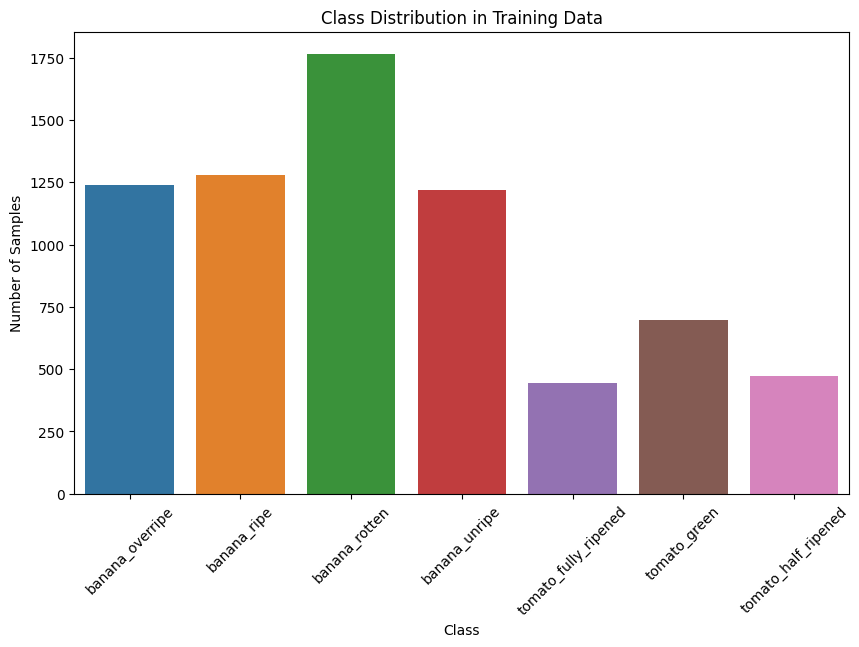

In [8]:
# Get class labels and their corresponding indices
class_labels = list(train_data.class_indices.keys())

# Count the number of samples per class
class_counts = np.bincount(train_data.classes)

# Plot the class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_labels, y=class_counts)
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()

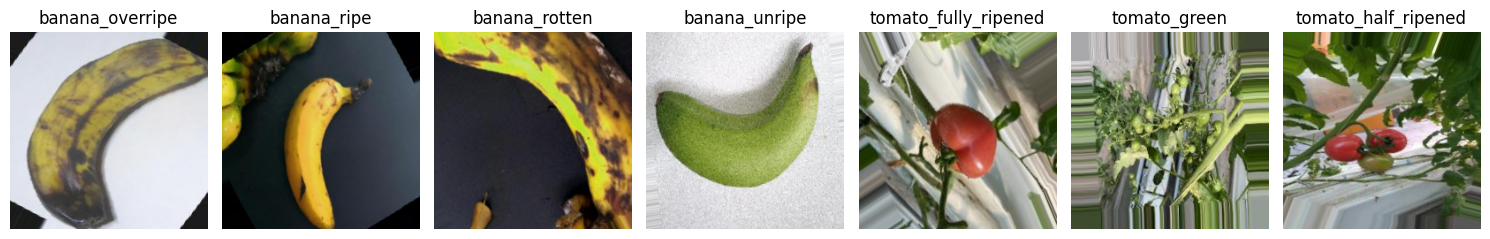

In [9]:
import matplotlib.pyplot as plt
import numpy as np

num_classes = len(train_data.class_indices)
class_names = list(train_data.class_indices.keys())

samples_per_class = {}

while len(samples_per_class) < num_classes:
    images, labels = next(train_data)  
    for img, label in zip(images, labels):
        class_index = np.argmax(label)
        if class_index not in samples_per_class:
            samples_per_class[class_index] = img
        if len(samples_per_class) == num_classes:
            break

plt.figure(figsize=(15, 8))
for class_index, img in samples_per_class.items():
    ax = plt.subplot(1, num_classes, class_index + 1)
    plt.imshow(img)
    plt.title(class_names[class_index])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [10]:
print(class_labels)
print(train_data.class_indices)

['banana_overripe', 'banana_ripe', 'banana_rotten', 'banana_unripe', 'tomato_fully_ripened', 'tomato_green', 'tomato_half_ripened']
{'banana_overripe': 0, 'banana_ripe': 1, 'banana_rotten': 2, 'banana_unripe': 3, 'tomato_fully_ripened': 4, 'tomato_green': 5, 'tomato_half_ripened': 6}


In [11]:
def calculate_class_weights_tf(labels):
    """
    Calculates class weights based on the frequency of each class in a TensorFlow tensor.

    Args:
        labels (tf.Tensor): 1D TensorFlow tensor of class labels (integer type).

    Returns:
        dict: A dictionary where keys are class labels (as Python integers) and
              values are their corresponding class weights (as Python floats).
              Returns an empty dict if input is invalid.
    """
    if not isinstance(labels, tf.Tensor):
        print("Error: Input 'labels' must be a TensorFlow tensor.")
        return {}  # Return an empty dictionary for error handling

    if labels.shape.ndims != 1:
        print("Error: Input 'labels' must be a 1D tensor.")
        return {}

    if labels.dtype not in [tf.int32, tf.int64]:
        print("Error: Input 'labels' must be an integer tensor (tf.int32 or tf.int64).")
        return {}

    unique_labels, _ = tf.unique(labels)
    num_samples = tf.cast(tf.shape(labels)[0], tf.float32)
    class_counts = tf.cast(tf.math.bincount(tf.cast(labels, dtype=tf.int32)), tf.float32)
    # Add epsilon for numerical stability
    class_weights_tensor = num_samples / (tf.cast(tf.shape(unique_labels)[0], tf.float32) * class_counts + tf.keras.backend.epsilon())

    # Create a dictionary mapping class labels to their weights
    class_weights_dict = {}
    for i, label in enumerate(unique_labels.numpy()):
        class_weights_dict[label] = class_weights_tensor[i].numpy()

    return class_weights_dict


In [12]:
y_train = train_data.classes
num_classes = train_data.num_classes
print(f"Number of classes: {num_classes}")
input_shape = train_data.image_shape

# Convert labels to TensorFlow tensor
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.int32)


# 3. Calculate class weights
class_weights = calculate_class_weights_tf(y_train_tensor)

print("Class labels:", np.unique(y_train))
print("Calculated class weights:", class_weights)


Number of classes: 7
Class labels: [0 1 2 3 4 5 6]
Calculated class weights: {0: 0.81993085, 1: 0.794308, 2: 0.5757159, 3: 0.8347408, 4: 2.289897, 5: 1.4587005, 6: 2.1540556}


I0000 00:00:1747450366.318983      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1747450366.319811      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [13]:
from tensorflow.keras import layers, Model

def create_inception_model(input_shape, num_classes):
    # Input layer
    inputs = layers.Input(shape=input_shape)

    # First Inception module
    tower_1 = layers.Conv2D(64, (1, 1), activation='relu', padding='same')(inputs)
    tower_1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(tower_1)

    tower_2 = layers.Conv2D(64, (1, 1), activation='relu', padding='same')(inputs)
    tower_2 = layers.Conv2D(64, (5, 5), activation='relu', padding='same')(tower_2)

    tower_3 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(inputs)
    tower_3 = layers.Conv2D(64, (1, 1), activation='relu', padding='same')(tower_3)

    # Concatenate towers
    inception_output = layers.concatenate([tower_1, tower_2, tower_3], axis=-1)

    # Global Average Pooling
    x = layers.GlobalAveragePooling2D()(inception_output)

    # Fully connected layer
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    # Output layer
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(inputs, outputs)
    return model

# Instantiate the Inception model
inception_model = create_inception_model(
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS),
    num_classes=len(class_labels)
)

# Compile the model
inception_model.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Print the model summary
inception_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 224, 224, 64)   │            256 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 224, 224, 64)   │            256 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 224, 224, 64)   │         36,928 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 224, 224, 64)   │        102,464 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 224, 224, 64)   │            256 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 224, 224, 192)  │              0 │ conv2d_1[0][0],        │
│                           │                        │                │ conv2d_3[0][0],        │
│                           │                        │                │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d  │ (None, 192)            │              0 │ concatenate[0][0]      │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │         24,704 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 128)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 7)              │            903 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 165,767 (647.53 KB)

 Trainable params: 165,767 (647.53 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
import tensorflow as tf
from tensorflow.keras import layers
import math
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=6,
    restore_best_weights=True,
    verbose=1)

reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1)

checkpoint_filepath = '/kaggle/working/inception.keras'

checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1)

callbacks = [early_stopping, reduce_lr, checkpoint]

history_inception = inception_model.fit(
    train_data,
    validation_data=val_data,
    epochs=30, 
    callbacks=callbacks,
    verbose=1
)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


I0000 00:00:1747450607.988677     147 service.cc:148] XLA service 0x7a332c10fb70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747450607.989332     147 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1747450607.989354     147 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1747450608.494451     147 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-05-17 02:56:56.131361: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng36{k2=3,k3=0} for conv (f32[32,64,224,224]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,224,224]{3,2,1,0}, f32[64,64,5,5]{3,2,1,0}, f32[64]{0}), window={size=5x5 pad=2_2x2_2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_

223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 570ms/step - accuracy: 0.2087 - loss: 1.8751
Epoch 1: val_accuracy improved from -inf to 0.24916, saving model to /kaggle/working/inception.keras
223/223 ━━━━━━━━━━━━━━━━━━━━ 219s 870ms/step - accuracy: 0.2088 - loss: 1.8749 - val_accuracy: 0.2492 - val_loss: 1.7338 - learning_rate: 1.0000e-04
Epoch 2/30
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 525ms/step - accuracy: 0.2799 - loss: 1.6986
Epoch 2: val_accuracy improved from 0.24916 to 0.34364, saving model to /kaggle/working/inception.keras
223/223 ━━━━━━━━━━━━━━━━━━━━ 172s 772ms/step - accuracy: 0.2801 - loss: 1.6984 - val_accuracy: 0.3436 - val_loss: 1.4581 - learning_rate: 1.0000e-04
Epoch 3/30
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.4300 - loss: 1.4534
Epoch 3: val_accuracy improved from 0.34364 to 0.57930, saving model to /kaggle/working/inception.keras
223/223 ━━━━━━━━━━━━━━━━━━━━ 166s 745ms/step - accuracy: 0.4301 - loss: 1.4532 - val_accuracy: 0.5793 - val_loss: 1.2435 - learning_rate: 1.

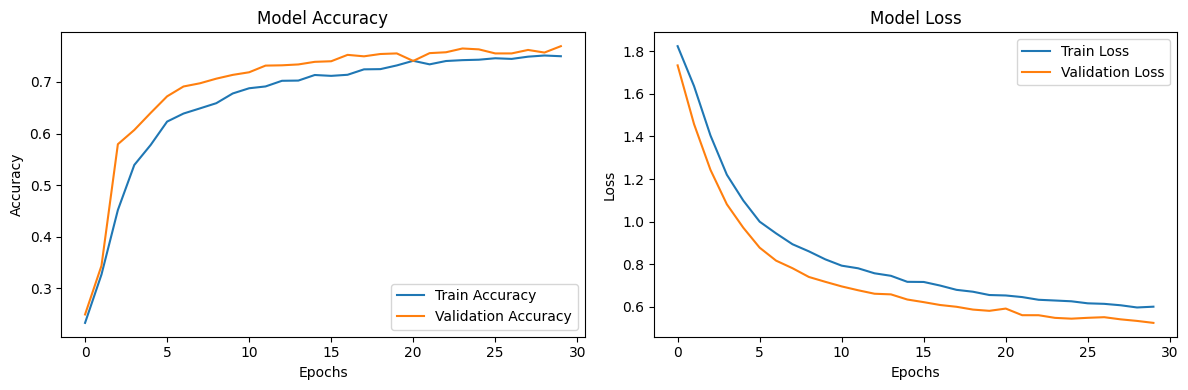

In [15]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_inception.history['accuracy'], label='Train Accuracy')
plt.plot(history_inception.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_inception.history['loss'], label='Train Loss')
plt.plot(history_inception.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

val_preds = np.argmax(inception_model.predict(val_data), axis=1)
val_labels = val_data.classes
print(classification_report(val_labels, val_preds, target_names=list(val_data.class_indices.keys())))

56/56 ━━━━━━━━━━━━━━━━━━━━ 49s 880ms/step
                      precision    recall  f1-score   support

     banana_overripe       0.85      0.80      0.83       310
         banana_ripe       0.82      0.86      0.84       320
       banana_rotten       0.80      0.78      0.79       441
       banana_unripe       0.91      0.94      0.92       304
tomato_fully_ripened       0.42      0.52      0.47       111
        tomato_green       0.64      0.80      0.71       174
 tomato_half_ripened       0.28      0.11      0.16       118

            accuracy                           0.77      1778
           macro avg       0.67      0.69      0.67      1778
        weighted avg       0.76      0.77      0.76      1778



Text(50.58159722222221, 0.5, 'True Labels')

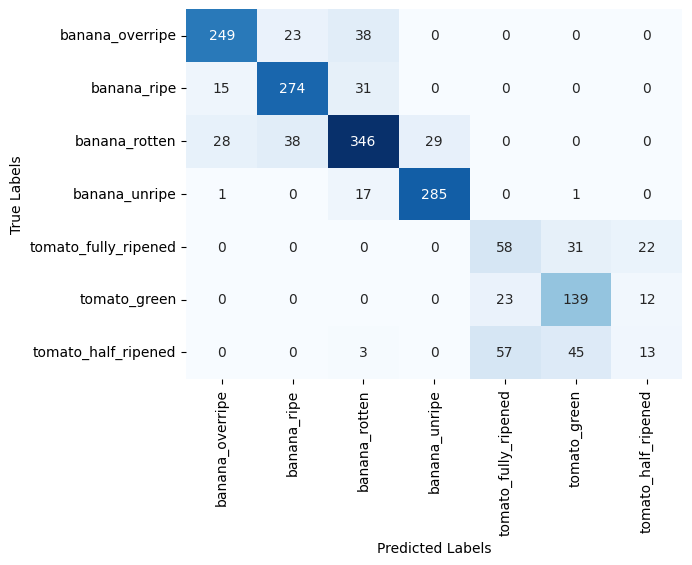

In [18]:
cm = confusion_matrix(val_labels, val_preds)
class_names = val_data.class_indices.keys()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')   

In [19]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Define the class label mapping (for converting numerical predictions to the required indices)
class_mapping = {
    'banana_overripe': 0,
    'banana_ripe': 1,
    'banana_rotten': 2,
    'banana_unripe': 3,
    'tomato_fully_ripened': 4,
    'tomato_green': 5,
    'tomato_half_ripened': 6
}

reverse_class_mapping = {v: k for k, v in class_mapping.items()}


test_data_gen = ImageDataGenerator(    
    rescale=1./255,
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest')


test_image_files = sorted([f for f in os.listdir('/kaggle/input/fine-grained-fruit-quality-assessment/test/testNew') if os.path.isfile(os.path.join('/kaggle/input/fine-grained-fruit-quality-assessment/test/testNew', f))])


test_data = test_data_gen.flow_from_dataframe(
    pd.DataFrame({'filename': test_image_files}),
    directory='/kaggle/input/fine-grained-fruit-quality-assessment/test/testNew',
    x_col='filename',
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode=None,  # No labels for test data
    shuffle=False
)

test_preds = inception_model.predict(test_data)

predicted_classes = np.argmax(test_preds, axis=1)


image_ids = test_image_files


submission_df = pd.DataFrame({'ImageID': image_ids, 'Class': predicted_classes})


submission_df.to_csv('/kaggle/working/inception_model.csv', index=False)

print("Submission file 'submission.csv' has been created successfully!")

Found 2484 validated image filenames.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


78/78 ━━━━━━━━━━━━━━━━━━━━ 56s 715ms/step
Submission file 'submission.csv' has been created successfully!


In [ ]:
submission_df.to_csv('/kaggle/working/hybrid_submission.csv', index=False)

In [20]:
inception_model.save('/kaggle/working/inception_model.keras')


In [22]:
inception_model.save_weights('/kaggle/working/inception_model.weights.h5')